# NER Coding Challenge

## 1 - Load the given training dataset

In [1]:
import pandas as pd
train_data = pd.read_csv("C:/Users/Sanjeev Narayanan/Desktop/Machine Learning Assingment/Wnut17 NER/train.txt", sep="\t", header=None,names=["Name", "Tag"])

## 1.1 - Understand what's there in the data - Exploratory Data Analysis
 First, the data is loaded into a Pandas DataFrame. This can be done easily using the read_csv function, specifying that the separator is a tab space.

In [2]:
train_data.head()

,Name,Tag
0,@paulwalk,O
1,It,O
2,'s,O
3,the,O
4,view,O


### Are there any NaN rows? If yes, remove them.

In [3]:
nan_rows = train_data[train_data['Name'].isnull()]
print("Number of Nan rows is %d" %(len(nan_rows)))

Number of Nan rows is 2168


In [4]:
train_data = train_data.dropna()
print("New training data length is %d" %(len(train_data)))

New training data length is 55725


### What are the entity tags?

[['O', 52997], ['B-person', 566], ['B-location', 494], ['I-person', 288], ['B-group', 230], ['I-location', 226], ['B-corporation', 196], ['I-product', 163], ['I-creative-work', 150], ['I-group', 132], ['B-product', 130], ['B-creative-work', 110], ['I-corporation', 43]]


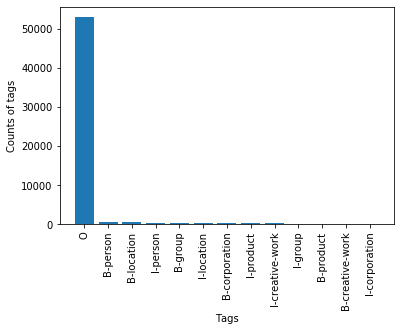

In [6]:
tags_list = train_data.Tag.value_counts().reset_index().values.tolist()
print(tags_list)
import matplotlib.pyplot as plt
tag_vals = [i[0] for i in tags_list]
counts = [i[1] for i in tags_list]
plt.bar(range(0,len(tag_vals)),counts)
plt.xticks(range(0,len(tag_vals)), tag_vals, rotation='vertical')
plt.xlabel("Tags")
plt.ylabel("Counts of tags")
plt.show()

We see that the tags are in "BIO" format. BIO stands for Beginning, Inside and Outside (of a text segment). In a system that recognizes entity boundaries only, only three labels are used: B, I and O. What is also understood from the above output is that the tags are not evenly distributed. Since the class 'O' is more than the rest, we shall neglect it and make use of the remaining tags.

[['B-person', 566], ['B-location', 494], ['I-person', 288], ['B-group', 230], ['I-location', 226], ['B-corporation', 196], ['I-product', 163], ['I-creative-work', 150], ['I-group', 132], ['B-product', 130], ['B-creative-work', 110], ['I-corporation', 43]]


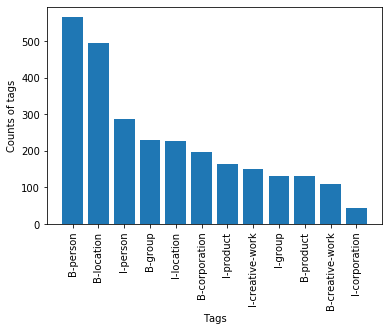

In [7]:
tags_list.pop(0)
print(tags_list)
tag_vals = [i[0] for i in tags_list]
counts = [i[1] for i in tags_list]
plt.bar(range(0,len(tag_vals)),counts)
plt.xticks(range(0,len(tag_vals)), tag_vals, rotation='vertical')
plt.xlabel("Tags")
plt.ylabel("Counts of tags")
plt.show()

### What else are present in the dataset?

In [12]:
Tag = namedtuple("Tag", ["token", "tag"])
def load_sequences(filename, sep="\t", notypes=False):
    tag_count = defaultdict(int)
    sequences = []
    with open(filename) as fp:
        seq = []
        for line in fp:
            line = line.strip()
            if line:
                line = line.split(sep)
                if notypes:
                    line[1] = line[1][0]
                tag_count[line[1]] += 1
                #print line
                seq.append(Tag(*line))
            else:
                sequences.append(seq)
                seq = []
        if seq:
            sequences.append(seq)
    return sequences, tag_count

In [13]:
sequences, tag_count = load_sequences("C:/Users/Sanjeev Narayanan/Desktop/Machine Learning Assingment/Wnut17 NER/train.txt", sep="\t")

In [14]:
import re
URL_REGEX = re.compile(r'^http[s]?://')
assert URL_REGEX.match("http://Google.com") is not None
assert URL_REGEX.match("https://Google.com") is not None
assert URL_REGEX.match("abchttps://Google.com") is None
REPEATED_CHAR_REGEX=re.compile(r'^[\.\,!\?"\':;_\-]{2,}$')
assert REPEATED_CHAR_REGEX.match("!") is None
assert REPEATED_CHAR_REGEX.match("!!") is not None
assert REPEATED_CHAR_REGEX.match("!?...!") is not None
assert REPEATED_CHAR_REGEX.match('".') is not None
assert REPEATED_CHAR_REGEX.match("aaaaa") is None
assert REPEATED_CHAR_REGEX.match('\".') is not None
WORD_REGEX=re.compile(r'^([A-Za-z]+[\'\-\.]?)+$')
assert WORD_REGEX.match("ABC") is not None
assert WORD_REGEX.match("ABC-D") is not None
assert WORD_REGEX.match("ABC'D") is not None
assert WORD_REGEX.match("ABC.DFC.") is not None
assert WORD_REGEX.match("9-1") is None
assert WORD_REGEX.match("A.B.C") is not None
NUMBER_REGEX=re.compile(r'^(([0-9]*[.]?[0-9]+)|([0-9]+[,]?[0-9]+))$')
assert NUMBER_REGEX.match("123") is not None
assert NUMBER_REGEX.match("123,4") is not None
assert NUMBER_REGEX.match("12.5") is not None
assert NUMBER_REGEX.match(".5") is not None
assert NUMBER_REGEX.match("12-A") is None
assert NUMBER_REGEX.match(",55") is None
assert NUMBER_REGEX.match("5.5.55") is None

In [15]:
def get_token_type(t):
    if len(t.token) > 1 and t.token[0] in ['\'', '\"', '(', '-']:
        return get_token_type(Tag(t.token[1:], t.tag))
    if len(t.token) > 1 and t.token[0] == "@":
        return "Mentions"
    if len(t.token) > 1 and t.token[0] == "#":
        return "Hashtags"
    if len(t.token) > 1 and t.token[0] == "$":
        return "Money"
    if URL_REGEX.match(t.token):
        return "URLs"
    if NUMBER_REGEX.match(t.token):
        return "Numbers"
    if WORD_REGEX.match(t.token):
        return "Words"
    if t.token.isalnum():
        return "Alphanumeric characters"
    if REPEATED_CHAR_REGEX.match(t.token):
        return "Repeated characters"
    return "Other"

In [16]:
from collections import namedtuple, defaultdict, Counter, OrderedDict
pd.DataFrame(Counter(get_token_type(t) for seq in sequences for t in seq).most_common(), columns=["Type", "Counts"])

,Type,Counts
0,Words,48016
1,Other,8036
2,Mentions,1961
3,Repeated characters,1229
4,Numbers,1218
5,URLs,955
6,Hashtags,826
7,Alphanumeric characters,459
8,Money,30


## 2 - Using basic algorithms like Perceptron, SGD classifier, Multinomial Naive Bayes classifier

### Transform the given data into operable form using DictVectorizer. Use a 67-33 split to generate a dev set

In [18]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
X = train_data.drop('Tag', axis=1)
v = DictVectorizer(sparse=False)
X = v.fit_transform(X.to_dict('records'))
y = train_data.Tag.values

classes = np.unique(y)
classes = classes.tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0)
print(X_train.shape, y_train.shape)

(37335, 13794) (37335,)


#### Load the libraries for the classifiers

In [19]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

### 2.1 Perceptron

In [20]:
per = Perceptron(verbose=10, n_jobs=-1, max_iter=5)
per.partial_fit(X_train, y_train, classes)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


-- Epoch 1-- Epoch 1-- Epoch 1

-- Epoch 1-- Epoch 1-- Epoch 1
-- Epoch 1


-- Epoch 1

Norm: 10.15, NNZs: 94, Bias: -1.000000, T: 37335, Avg. loss: 0.002330
Total training time: 1.72 seconds.
Norm: 6.71, NNZs: 39, Bias: -1.000000, T: 37335, Avg. loss: 0.000857Norm: 13.15, NNZs: 149, Bias: -1.000000, T: 37335, Avg. loss: 0.002303
Total training time: 1.75 seconds.

Total training time: 1.72 seconds.
-- Epoch 1
Norm: 27.00, NNZs: 617, Bias: -1.000000, T: 37335, Avg. loss: 0.009214Norm: 10.77, NNZs: 99, Bias: -2.000000, T: 37335, Avg. loss: 0.003589Norm: 17.06, NNZs: 259, Bias: -1.000000, T: 37335, Avg. loss: 0.004741
Total training time: 1.79 seconds.


Total training time: 1.77 seconds.
Total training time: 1.77 seconds.
-- Epoch 1
-- Epoch 1
Norm: 24.84, NNZs: 518, Bias: -1.000000, T: 37335, Avg. loss: 0.008785-- Epoch 1
Total training time: 1.85 seconds.


[Parallel(n_jobs=-1)]: Done   2 out of  13 | elapsed:    1.8s remaining:   10.2s
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:    1.8s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done   6 out of  13 | elapsed:    1.9s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done   8 out of  13 | elapsed:    1.9s remaining:    1.2s


-- Epoch 1

Norm: 14.80, NNZs: 170, Bias: -1.000000, T: 37335, Avg. loss: 0.002437
Total training time: 1.88 seconds.
Norm: 10.15, NNZs: 97, Bias: -1.000000, T: 37335, Avg. loss: 0.002973
Total training time: 1.09 seconds.
Norm: 18.63, NNZs: 305, Bias: -1.000000, T: 37335, Avg. loss: 0.005277
Total training time: 1.05 seconds.
Norm: 15.75, NNZs: 221, Bias: -2.000000, T: 37335, Avg. loss: 0.004071
Total training time: 1.16 seconds.
Norm: 13.30, NNZs: 163, Bias: -1.000000, T: 37335, Avg. loss: 0.003589
Total training time: 1.17 seconds.
Norm: 57.73, NNZs: 2645, Bias: 1.000000, T: 37335, Avg. loss: 0.045909
Total training time: 1.14 seconds.


[Parallel(n_jobs=-1)]: Done  10 out of  13 | elapsed:    2.9s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    3.1s finished


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=5, n_iter_no_change=5, n_jobs=-1,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=10, warm_start=False)

#### Evaluating the classification metric without the Tag 'O'

In [23]:
new_classes = classes.copy()
new_classes.pop()
print(classification_report(y_pred=per.predict(X_test), y_true=y_test, labels=new_classes))

                 precision    recall  f1-score   support

  B-corporation       0.69      0.36      0.47        67
B-creative-work       0.40      0.10      0.16        41
        B-group       0.42      0.15      0.22        68
     B-location       0.73      0.28      0.40       165
       B-person       0.72      0.28      0.41       186
      B-product       0.47      0.18      0.26        38
  I-corporation       0.00      0.00      0.00        16
I-creative-work       0.00      0.00      0.00        53
        I-group       0.25      0.12      0.16        51
     I-location       0.60      0.04      0.07        83
       I-person       0.67      0.17      0.27        93
      I-product       0.59      0.20      0.29        51

      micro avg       0.61      0.20      0.30       912
      macro avg       0.46      0.16      0.23       912
   weighted avg       0.57      0.20      0.28       912



### 2.2 SGD Classifier

In [22]:
sgd = SGDClassifier()
sgd.partial_fit(X_train, y_train, classes)
print(classification_report(y_pred=sgd.predict(X_test), y_true=y_test, labels=new_classes))

C:\Users\Sanjeev Narayanan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                 precision    recall  f1-score   support

  B-corporation       1.00      0.24      0.39        67
B-creative-work       0.00      0.00      0.00        41
        B-group       0.00      0.00      0.00        68
     B-location       0.80      0.02      0.05       165
       B-person       1.00      0.06      0.11       186
      B-product       0.00      0.00      0.00        38
  I-corporation       0.00      0.00      0.00        16
I-creative-work       0.00      0.00      0.00        53
        I-group       0.00      0.00      0.00        51
     I-location       0.00      0.00      0.00        83
       I-person       0.83      0.05      0.10        93
      I-product       0.00      0.00      0.00        51

      micro avg       0.95      0.04      0.08       912
      macro avg       0.30      0.03      0.05       912
   weighted avg       0.51      0.04      0.07       912



### 2.3 Multinomial Naive Bayes Classifier

In [24]:
nb = MultinomialNB(alpha=0.01)
nb.partial_fit(X_train, y_train, classes)
print(classification_report(y_pred=nb.predict(X_test), y_true=y_test, labels = new_classes))

                 precision    recall  f1-score   support

  B-corporation       0.90      0.39      0.54        67
B-creative-work       0.33      0.02      0.05        41
        B-group       0.50      0.15      0.23        68
     B-location       0.77      0.26      0.39       165
       B-person       0.68      0.25      0.37       186
      B-product       0.70      0.18      0.29        38
  I-corporation       0.00      0.00      0.00        16
I-creative-work       0.00      0.00      0.00        53
        I-group       0.38      0.06      0.10        51
     I-location       0.42      0.12      0.19        83
       I-person       0.67      0.19      0.30        93
      I-product       0.60      0.18      0.27        51

      micro avg       0.66      0.19      0.30       912
      macro avg       0.49      0.15      0.23       912
   weighted avg       0.59      0.19      0.29       912



While the precision values are somewhat is the acceptable range, the recall values are very poor and so is their harmonic mean - F1-score. None of the above classifiers produced satisfying results. It is obvious that it is not going to be easy to classify named entities using regular classifiers.

## 3 - Using Conditional Random Fields
#### Conditional random fields (CRFs) are a class of statistical modeling method often applied in pattern recognition and machine learning and used for structured prediction. CRFs is often used for labeling or parsing of sequential data, such as natural language processing and CRFs find applications in POS Tagging, named entity recognition, among others.

#### Load the data as a list 

In [25]:
train_data_list = train_data.values.tolist()

### Perform POS tagging for every token in the dataset

In [33]:
import nltk
import numpy as np
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sanjeev
[nltk_data]     Narayanan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [93]:
data = []
for i, doc in enumerate(train_data_list):
    docs = [(doc[0],doc[1])]
    tokens = [doc[0]]
    tagged = nltk.pos_tag(tokens)
    data.append([(w, pos, label) for (w, label), (word, pos) in zip(docs, tagged)])

#### How this data variable looks after POS tagging

In [29]:
data[:10]

[[('@paulwalk', 'NN', 'O')],
 [('It', 'PRP', 'O')],
 [("'s", 'POS', 'O')],
 [('the', 'DT', 'O')],
 [('view', 'NN', 'O')],
 [('from', 'IN', 'O')],
 [('where', 'WRB', 'O')],
 [('I', 'PRP', 'O')],
 [("'m", 'VBP', 'O')],
 [('living', 'NN', 'O')]]

### Begin training on the CRFsuite

In [30]:
from sklearn.model_selection import train_test_split
import sklearn_crfsuite
from sklearn_crfsuite import metrics

#### I will extract more features in the crfsuite format (word parts, simplified POS tags, lower/title/upper flags, features of nearby words)

In [31]:
def word2features(doc, i):
    word = doc[i][0]
    postag = doc[i][1]
    features = [
        'bias',
        'word.lower=' + word.lower(),
        'word[-3:]=' + word[-3:],
        'word[-2:]=' + word[-2:],
        'word.isupper=%s' % word.isupper(),
        'word.istitle=%s' % word.istitle(),
        'word.isdigit=%s' % word.isdigit(),
        'postag=' + postag
    ]

    # Features for words that are not
    # at the beginning of a document
    if i > 0:
        word1 = doc[i-1][0]
        postag1 = doc[i-1][1]
        features.extend([
            '-1:word.lower=' + word1.lower(),
            '-1:word.istitle=%s' % word1.istitle(),
            '-1:word.isupper=%s' % word1.isupper(),
            '-1:word.isdigit=%s' % word1.isdigit(),
            '-1:postag=' + postag1
        ])
    else:
        features.append('BOS')  #Beginning of a sentence
    # If we have features at the beginning of a sentence
    if i < len(doc)-1:
        word1 = doc[i+1][0]
        postag1 = doc[i+1][1]
        features.extend([
            '+1:word.lower=' + word1.lower(),
            '+1:word.istitle=%s' % word1.istitle(),
            '+1:word.isupper=%s' % word1.isupper(),
            '+1:word.isdigit=%s' % word1.isdigit(),
            '+1:postag=' + postag1
        ])
    else:
        features.append('EOS') #End of a sentence

    return features

def extract_features(doc):
    return [word2features(doc, i) for i in range(len(doc))]

def get_labels(doc):
    return [label for (token, postag, label) in doc]

def get_tokens(doc):
    return [token for token, postag, label in doc]

In [37]:
X = [extract_features(doc) for doc in data]
y = [get_labels(doc) for doc in data]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
crf = sklearn_crfsuite.CRF(algorithm='lbfgs',c1=0.1,c2=0.1,max_iterations=100,all_possible_transitions=True)

In [39]:
crf.fit(X_train, y_train)
y_pred = crf.predict(X_test)
print(metrics.flat_classification_report(y_test, y_pred, labels = new_classes))

C:\Users\Sanjeev Narayanan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                 precision    recall  f1-score   support

  B-corporation       0.82      0.51      0.63        45
B-creative-work       0.40      0.08      0.13        25
        B-group       0.30      0.07      0.12        42
     B-location       0.63      0.30      0.40       114
       B-person       0.71      0.37      0.48       130
      B-product       1.00      0.29      0.45        24
  I-corporation       0.00      0.00      0.00         6
I-creative-work       0.33      0.11      0.16        28
        I-group       0.00      0.00      0.00        26
     I-location       0.47      0.18      0.26        39
       I-person       0.27      0.08      0.12        51
      I-product       0.50      0.06      0.11        33

      micro avg       0.61      0.24      0.34       563
      macro avg       0.45      0.17      0.24       563
   weighted avg       0.54      0.24      0.32       563



### It is evident that the F1 scores for Conditional Random Field approach is better than regular classifiers. 

## 4 - Using Deep Learning Methods
### I will now look to improve the earlier results using LSTM based methods.
#### Data Preparation

In [80]:
words = list(set(train_data["Name"].values))
n_words = len(words)

In [81]:
tags = list(set(train_data["Tag"].values))
n_tags = len(tags)

In [82]:
labels = [[s[2] for s in sent] for sent in data]
sentences = [" ".join([s[0] for s in sent]) for sent in data]

In [85]:
from collections import Counter
from keras.preprocessing.sequence import pad_sequences

word_cnt = Counter(train_data["Name"].values)
vocabulary = set(w[0] for w in word_cnt.most_common(5000))

In [86]:
max_len = 50
word2idx = {"PAD": 0, "UNK": 1}
word2idx.update({w: i for i, w in enumerate(words) if w in vocabulary})
tag2idx = {t: i for i, t in enumerate(tags)}

In [88]:
X = [[word2idx.get(w, word2idx["UNK"]) for w in s.split()] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=word2idx["PAD"])

In [89]:
y = [[tag2idx[l_i] for l_i in l] for l in labels]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])

In [90]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1, shuffle=False)

In [91]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, SpatialDropout1D, Bidirectional
word_input = Input(shape=(max_len,))
model = Embedding(input_dim=n_words, output_dim=50, input_length=max_len)(word_input)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(n_tags, activation="softmax"))(model)
model = Model(word_input, out)
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 50)                0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 50, 50)            689700    
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 50, 50)            0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 50, 200)           120800    
_________________________________________________________________
time_distributed_11 (TimeDis (None, 50, 13)            2613      
Total params: 813,113
Trainable params: 813,113
Non-trainable params: 0
_________________________________________________________________


In [92]:
history = model.fit(X_tr, y_tr.reshape(*y_tr.shape, 1),
                    batch_size=32, epochs=5,
                    validation_split=0.1, verbose=1)

Train on 45136 samples, validate on 5016 samples
Epoch 1/5


InvalidArgumentError: Incompatible shapes: [1600] vs. [32,50]
	 [[{{node metrics_4/acc/Equal}}]]